In [1]:
from simpleabc import simple_abc
import simple_model
import numpy as np
import pickle 
import pylab as plt
from scipy import stats
import time
%matplotlib inline
plt.style.use('ggplot')

In [5]:
np.random.seed(914)

steps = 10
eps = 0.25
min_part = 10

#stars = pickle.load(file('stars.pkl'))
stars = pickle.load(file('stars_trimmed.pkl'))
#obs = pickle.load(file('data.pkl'))

model = simple_model.MyModel(stars)

#theta = (mututal inclination, eccentricity, planet number)

model.set_prior([stats.uniform(0, 90.0),
                stats.uniform(0, 1.0),
                stats.uniform(0,20)])


#theta = (0.513265306122, 0.1)
theta = (2.0, 0.1, 5)

obs = model.generate_data(theta)
model.set_data(obs)





n_procs = [1, 2, 3, 4, 5, 6, 7, 8]

start = time.time()
OT = simple_abc.pmc_abc(model, obs, epsilon_0=eps, min_particles=min_part, steps=steps,
                        target_epsilon=eps, parallel=False)
end = time.time()
print 'Serial took {}s'.format(end - start)
out_pickle = file('simptest.pkl', 'w')
pickle.dump(OT, out_pickle)
out_pickle.close()

0 0.25
1 0.216075858308
Effective sample size(s): [[ 11.  11.  11.]]
2 0.163087459755
Effective sample size(s): [[ 11.  11.  11.]]
3 0.122360736573
Effective sample size(s): [[ 11.  11.   8.]]
4 0.0766304504081
Effective sample size(s): [[ 11.  11.   7.]]
5 0.0517698896437
Effective sample size(s): [[ 11.  11.  11.]]
6 0.0410605718531
Effective sample size(s): [[ 11.  11.   9.]]
7 0.0356526686345
Effective sample size(s): [[ 11.  11.   8.]]
8 0.0320204836636
Effective sample size(s): [[ 11.  11.  11.]]
9 0.025928195463
Effective sample size(s): [[ 11.  11.  11.]]
Serial took 182.420753002s


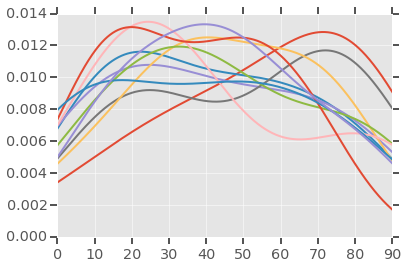

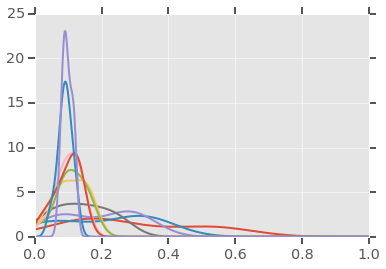

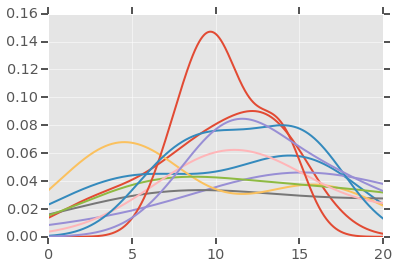

In [6]:
for P in OT:
    ker = stats.gaussian_kde([x[0] for x in P[0]])
    x = np.linspace(0.0,90,1000)
    plt.plot(x,ker(x))
plt.figure()
for P in OT:
    ker = stats.gaussian_kde([x[1] for x in P[0]])
    x = np.linspace(0.0,1.0,1000)
    plt.plot(x,ker(x))
plt.figure()
for P in OT:
    ker = stats.gaussian_kde([x[2] for x in P[0]])
    x = np.linspace(0,20,1000)
    plt.plot(x,ker(x))